In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv',usecols=['Age','Cabin','Embarked'])
df.head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


# ++ Handiling NAN Value for Continuous Variable  

### 1.Replacing NAN Values With Mean/Median/Mode
Meadian-replace outlier

In [2]:
df.isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [3]:
median_Age=df.Age.median()
def Replace_median(df,variable,median):
    df[variable]=df[variable].fillna(median)
Replace_median(df,'Age',median_Age)

In [4]:
df.Age.isna().sum()

np.int64(0)

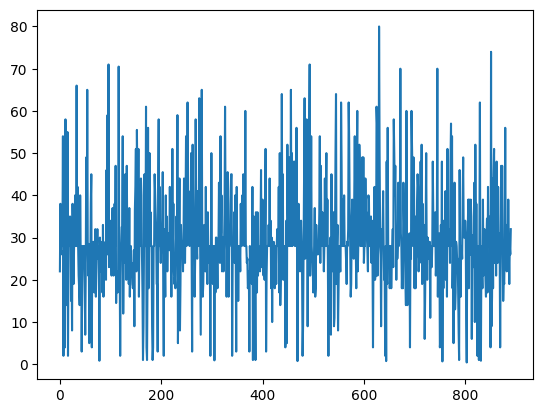

In [5]:
import matplotlib.pyplot as plt
plt.plot(df.Age)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

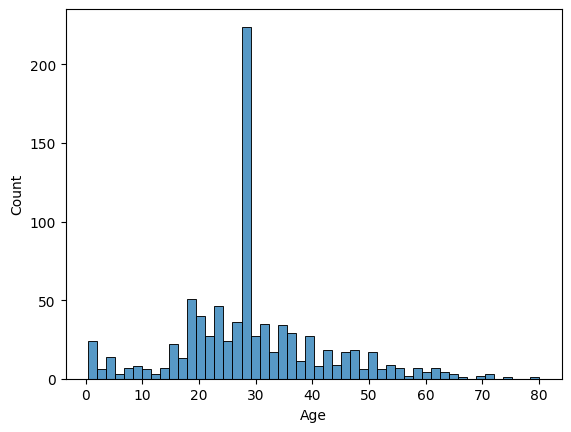

In [6]:
import seaborn as sns
sns.histplot(data=df.Age,bins=50)

#### Most of the values is skewed across median_Age=29

### 2.Replacing NAN Values with a Sample

In [7]:
df.Cabin.isna().sum()

np.int64(687)

In [8]:
df.Cabin.dropna().sample()

802    B96 B98
Name: Cabin, dtype: object

df.Cabin.dropna().sample(df.Cabin.isna().sum(),random_state=1)

Error:

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[36], line 1
----> 1 df.Cabin.dropna().sample(df.Cabin.isna().sum(),random_state=1)

File ~\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py:6118, in NDFrame.sample(self, n, frac, replace, weights, random_state, axis, ignore_index)
   6115 if weights is not None:
   6116     weights = sample.preprocess_weights(self, weights, axis)
-> 6118 sampled_indices = sample.sample(obj_len, size, replace, weights, rs)
   6119 result = self.take(sampled_indices, axis=axis)
   6121 if ignore_index:

File ~\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\sample.py:152, in sample(obj_len, size, replace, weights, random_state)
    149     else:
    150         raise ValueError("Invalid weights: weights sum to zero")
--> 152 return random_state.choice(obj_len, size=size, replace=replace, p=weights).astype(
    153     np.intp, copy=False
    154 )

File numpy\\random\\mtrand.pyx:1024, in numpy.random.mtrand.RandomState.choice()

ValueError: Cannot take a larger sample than population when 'replace=False'


Here we are skipping the cabin Feature because the missing value are greater thn population

In [9]:
df=pd.read_csv('titanic.csv',usecols=['Age','Cabin','Embarked'])
df.Age.isna().sum()

np.int64(177)

In [10]:
impute_value=df.Age.dropna().sample(df.Age.isna().sum(),random_state=0)
impute_value

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [11]:
df['Age'][423]

np.float64(28.0)

In [12]:
def Sample_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_nan']=np.where(df[variable].isna(),1,0)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    random_sample.index=df[df[variable].isna()].index
    df.loc[df[variable].isna(),variable+'_random']=random_sample

In [13]:
Sample_nan(df,'Age',median_Age)
df['Age_random'].isna().sum()

np.int64(0)

<Axes: xlabel='Age_random', ylabel='Count'>

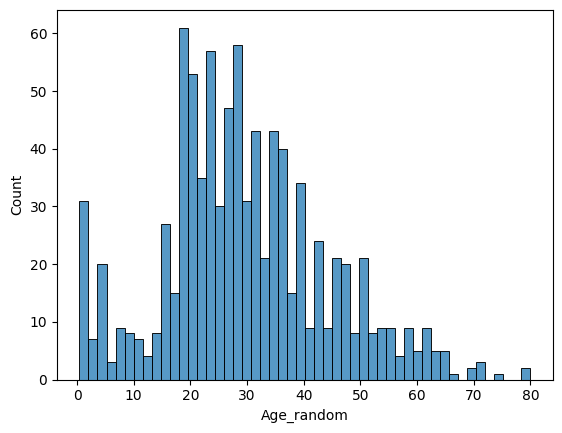

In [14]:
sns.histplot(data=df['Age_random'],bins=50)

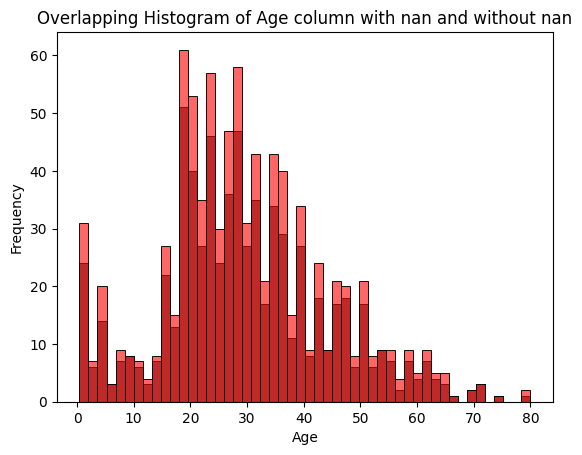

In [15]:
sns.histplot(data=df['Age'], bins=50, color='black', edgecolor='black', alpha=0.6)
sns.histplot(data=df['Age_random'], bins=50, color='red', edgecolor='black', alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Overlapping Histogram of Age column with nan and without nan")
plt.show()

### 3.Capturing Nan values with new Feature

In [16]:
df.Cabin.isna().sum()

np.int64(687)

In [17]:
Sample_Cabin=df['Cabin'].dropna().sample(1,random_state=0).iloc[0]
def New_Feature(df,variable,sample):
    df[variable+'_new']=np.where(df[variable].isna(),1,0)
    df[variable]=df[variable].fillna(sample)

New_Feature(df,'Cabin',Sample_Cabin)

In [18]:
df.Cabin.isna().sum()

np.int64(0)

Note: Samplpe Always Return a Series

<Axes: ylabel='Cabin'>

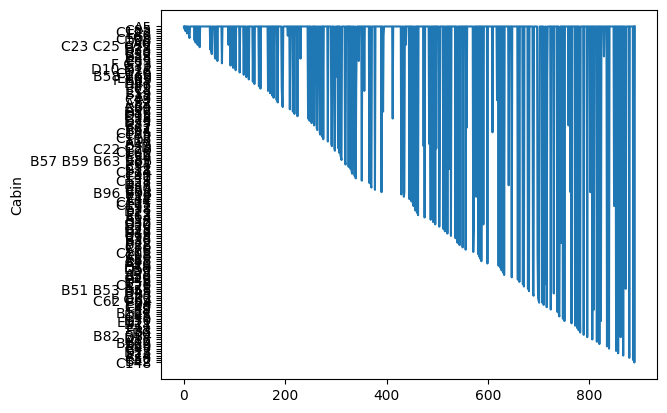

In [19]:
sns.lineplot(data=df['Cabin'])

### 4.Replacing Nan Values with End of Distribution 

In [20]:
df=pd.read_csv('titanic.csv',usecols=['Age','Cabin','Embarked'])
df.head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


<Axes: xlabel='Age', ylabel='Count'>

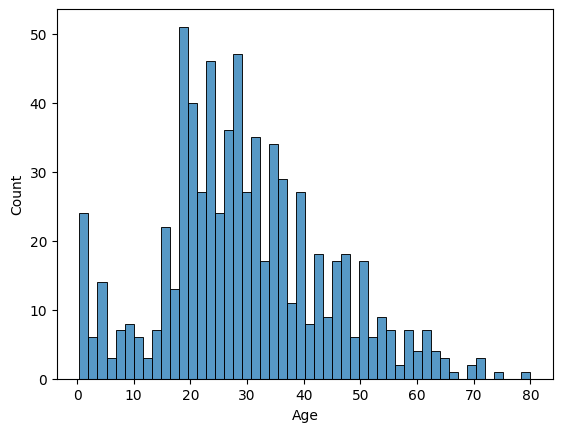

In [21]:
sns.histplot(data=df['Age'],bins=50)

In [22]:
impute_value=df['Age'].mean()+3*df['Age'].std()

In [23]:
def Replace_EOD(df,variable):
    value=df[variable].mean()+3*df[variable].std()
    df[variable].fillna(value,inplace=True)
Replace_EOD(df,'Age')

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16924\1656483117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(value,inplace=True)


In [24]:
df['Age'].isna().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='Count'>

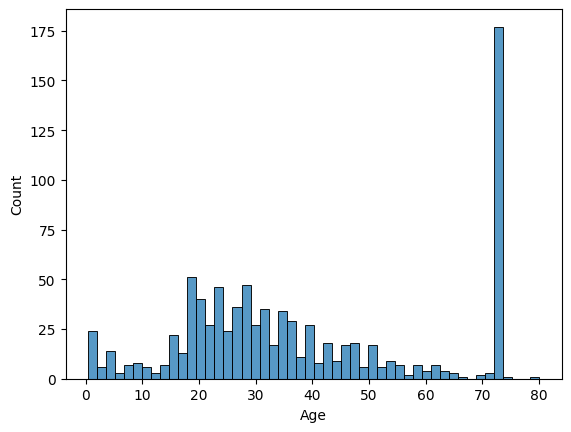

In [25]:
sns.histplot(data=df['Age'],bins=50)

All nan values are replaced by End of Distribution 
and Histogram is Skewed to right 

### 4.Replacing by Arbitary value 

In [26]:
df=pd.read_csv('titanic.csv',usecols=['Age','Cabin','Embarked'])
df.head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


In [27]:
df.Age.isna().sum()

np.int64(177)

In [28]:
df.Embarked.isna().sum()

np.int64(2)

<Axes: ylabel='Age'>

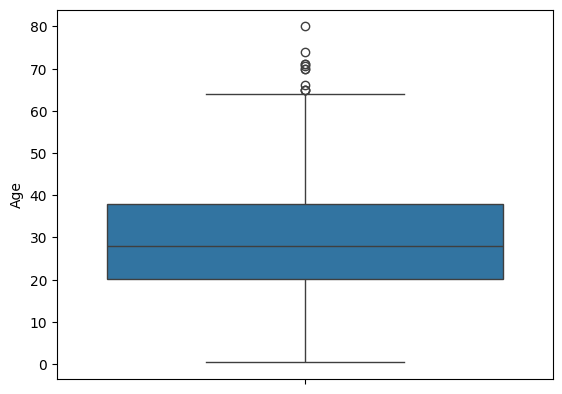

In [29]:
sns.boxplot(data=df['Age'])

<Axes: ylabel='Embarked'>

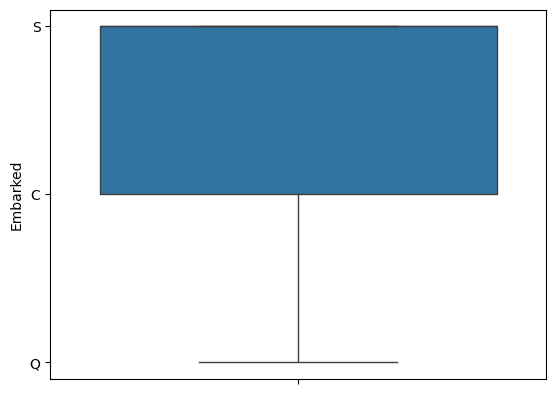

In [30]:
sns.boxplot(data=df['Embarked'])

Embarked had no Outlier but Age and Cabin Feature as so We are replacing 
- Embarked feature nan value by least occuring value
- Age and Cabin Feature nan value by their outlier

In [32]:
df['Age'].mean()+3*df['Age'].std()

np.float64(73.27860964406094)

In [39]:
df['Embarked'].value_counts().sort_values(ascending=False).index

Index(['S', 'C', 'Q'], dtype='object', name='Embarked')

In [40]:
def impute_arbitaryEOD(df,variable):
    outlier=df[variable].mean()+3*df[variable].std()
    df[variable+'_EOD']=df[variable].fillna(outlier)
def impute_arbitaryLeastOccurence(df,variable):
    value=df[variable].value_counts().sort_values(ascending=False).index[2]
    df[variable+'_LeastOccurence']=df[variable].fillna(value)

impute_arbitaryEOD(df,'Age')
impute_arbitaryLeastOccurence(df,'Cabin')
impute_arbitaryLeastOccurence(df,'Embarked')

In [41]:
df.isna().sum()

Age                        177
Cabin                      687
Embarked                     2
Age_EOD                      0
Cabin_LeastOccurence         0
Embarked_LeastOccurence      0
dtype: int64

<Axes: ylabel='Age_EOD'>

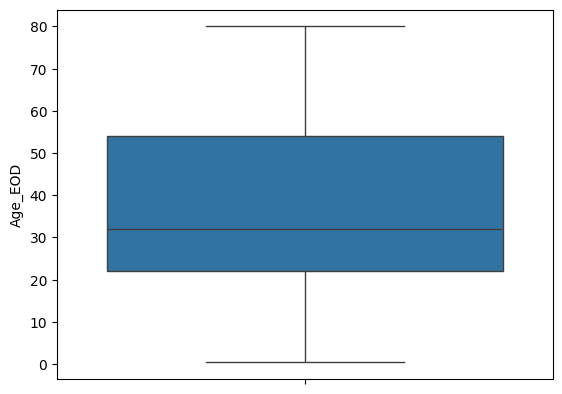

In [43]:
sns.boxplot(data=df['Age_EOD'])

Outlier had removed

# ++ Handiling NAN Value for Categorical feature 

In [45]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
df=pd.read_csv('loan.csv',usecols=['SalePrice','GarageType', 'FireplaceQu','BsmtQual'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [47]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [48]:
df.shape

(1460, 4)

### 5.Replacing nan with most frequent values 

As it will work with feature which have less nan value well good ,but replacing with with feature that have more variance will disort the data

<Axes: ylabel='Count'>

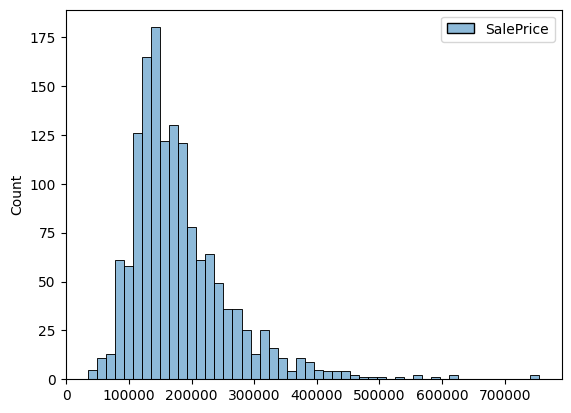

In [50]:
sns.histplot(data=df,bins=50)

guess was correct it is GAMMA DISTRIBUTION and all SalesPrice feature is dependend

In [55]:
def impute(df,variable):
    value=df[variable].dropna().mode()[0]
    df[variable+'_frequent']=df[variable].fillna(value)
impute(df,'GarageType')
df['GarageType_frequent'].isna().sum()

np.int64(0)

In [54]:
df['GarageType'].mode()[0]

'Attchd'

In [57]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_frequent
0,Gd,NaN,Attchd,208500,Attchd
1,Gd,TA,Attchd,181500,Attchd
2,Gd,TA,Attchd,223500,Attchd
3,TA,Gd,Detchd,140000,Detchd
4,Gd,TA,Attchd,250000,Attchd


In [58]:
impute(df,'BsmtQual')
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_frequent,BsmtQual_frequent
0,Gd,NaN,Attchd,208500,Attchd,Gd
1,Gd,TA,Attchd,181500,Attchd,Gd
2,Gd,TA,Attchd,223500,Attchd,Gd
3,TA,Gd,Detchd,140000,Detchd,TA
4,Gd,TA,Attchd,250000,Attchd,Gd


### 6. Adding Value to NAN 

Here our approach is to convert nan to one hot encoding and replace the nan value with most frequeb=nt occuring in that feature

In [59]:
df=pd.read_csv('loan.csv',usecols=['SalePrice','GarageType', 'FireplaceQu','BsmtQual'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
def impute(df,variable):
    frequent=df[variable].mode()[0]
    df[variable+'_nan']=np.where(df[variable].isna(),1,0)
    df[variable]=df[variable].fillna(frequent)
impute(df,'GarageType')
impute(df,'FireplaceQu')
impute(df,'BsmtQual')

In [62]:
df.isna().sum()

BsmtQual           0
FireplaceQu        0
GarageType         0
SalePrice          0
GarageType_nan     0
FireplaceQu_nan    0
BsmtQual_nan       0
dtype: int64

In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_nan,FireplaceQu_nan,BsmtQual_nan
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


### 7. Replacing nan value with other category(category=Missing)

In [64]:
df=pd.read_csv('loan.csv',usecols=['SalePrice','GarageType', 'FireplaceQu','BsmtQual'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [65]:
def impute_category(df,variable):
    df[variable+'_category']=np.where(df[variable].isna(),'Missing',df[variable])
impute_category(df,'GarageType')

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_category
0,Gd,NaN,Attchd,208500,Attchd
1,Gd,TA,Attchd,181500,Attchd
2,Gd,TA,Attchd,223500,Attchd
3,TA,Gd,Detchd,140000,Detchd
4,Gd,TA,Attchd,250000,Attchd


In [67]:
impute_category(df,'FireplaceQu')
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_category,FireplaceQu_category
0,Gd,NaN,Attchd,208500,Attchd,Missing
1,Gd,TA,Attchd,181500,Attchd,TA
2,Gd,TA,Attchd,223500,Attchd,TA
3,TA,Gd,Detchd,140000,Detchd,Gd
4,Gd,TA,Attchd,250000,Attchd,TA
